# Proyek Analisis Data: Bike Sharing Data
- **Nama:** Riandika Lumaris
- **Email:** riandika.lumaris@outlook.com
- **ID Dicoding:** Riandika Lumaris

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan penjualan layanan bike sharing tiap bulannya?
- Pada temperatur cuaca berapakah layanan bike sharing paling banyak digunakan?

## Import Semua Packages/Library yang Digunakan

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Data Wrangling

### Gathering Data

In [17]:
df = pd.read_csv("data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [18]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Semua data lengkap.
- Tidak ada data yang terduplikasi.

### Cleaning Data

In [20]:
# Convert to actual temp because the temperature is normalized
df["temp_actual"] = (df["temp"] * (39 - (-8)) + (-8)).astype(int)

# Convert the 'dteday' column to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Add year and month for grouping reason
df['year_month'] = df['dteday'].dt.to_period('M')

**Insight:**
- Data temperatur perlu dikonversi karena data temperatur yang ada sudah dinormalisasi.
- Data 'dteday' berupa string, jadi harus dikonversi menjadi tanggal.
- Setelah data 'dteday' dikonversi, data 'year_month' perlu ditambahkan untuk memudahkan grouping berdasarkan bulan dan tahun.

## Exploratory Data Analysis (EDA)

### Explore ...

In [21]:
print("Missing date values: " + str(df["dteday"].isna().sum()))

# Show all year and month (using DataFrame for visualization purposes)
pd.DataFrame(df["year_month"].drop_duplicates().reset_index(drop=True))

Missing date values: 0


,year_month
0,2011-01
1,2011-02
2,2011-03
3,2011-04
4,2011-05
5,2011-06
6,2011-07
7,2011-08
8,2011-09
9,2011-10


**Kesimpulan**: Data order yang ada mencakup dua tahun, yaitu tahun 2011 dan 2012.

count    731.000000
mean      14.796170
std        8.546779
min       -5.000000
25%        7.000000
50%       15.000000
75%       22.000000
max       32.000000
Name: temp_actual, dtype: float64

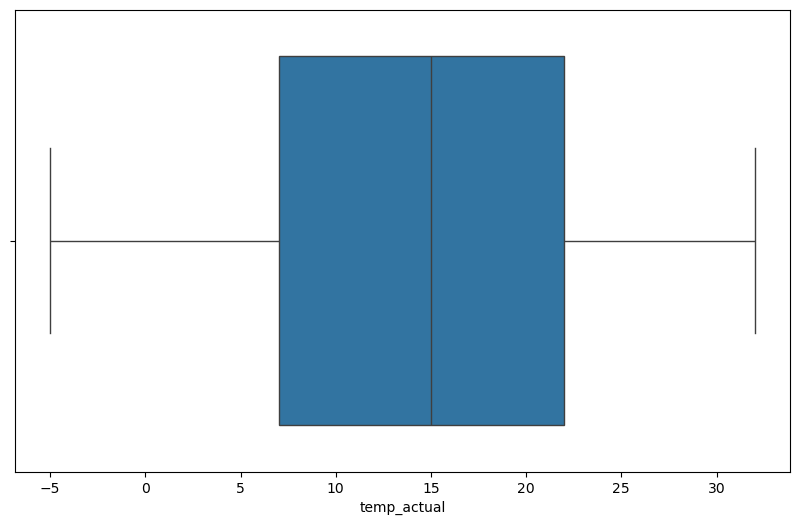

In [22]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sb.boxplot(x='temp_actual', data=df)
df["temp_actual"].describe()

**Kesimpulan**: Data temperatur yang ada sudah cukup beragam, antara -5 sampai 32 derajat Celcius. Tidak ada outlier terdeteksi.

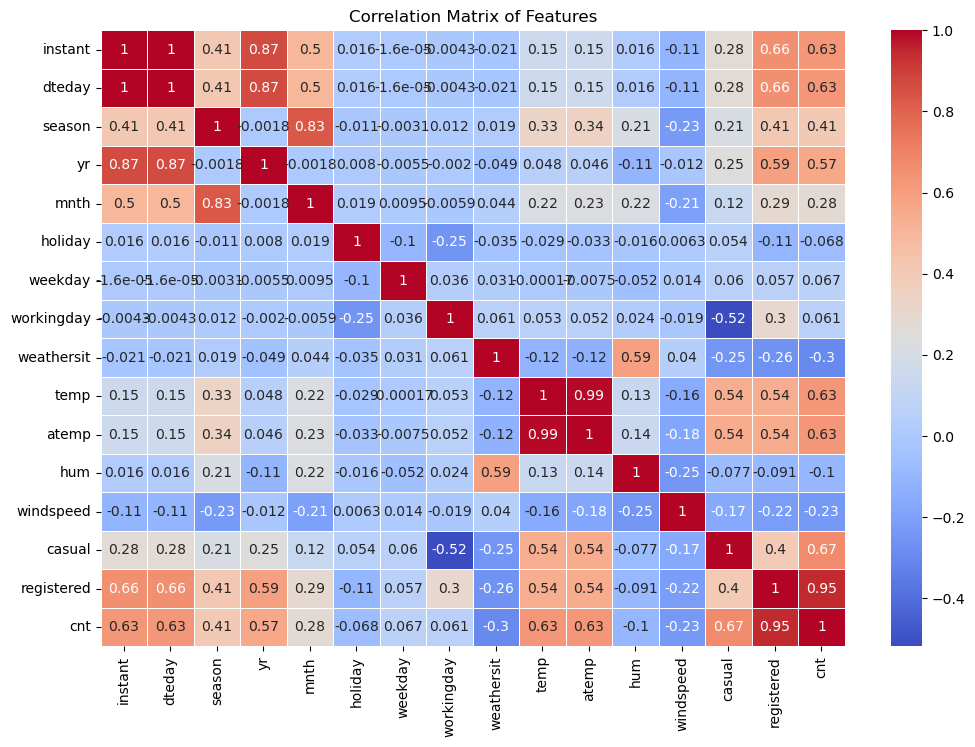

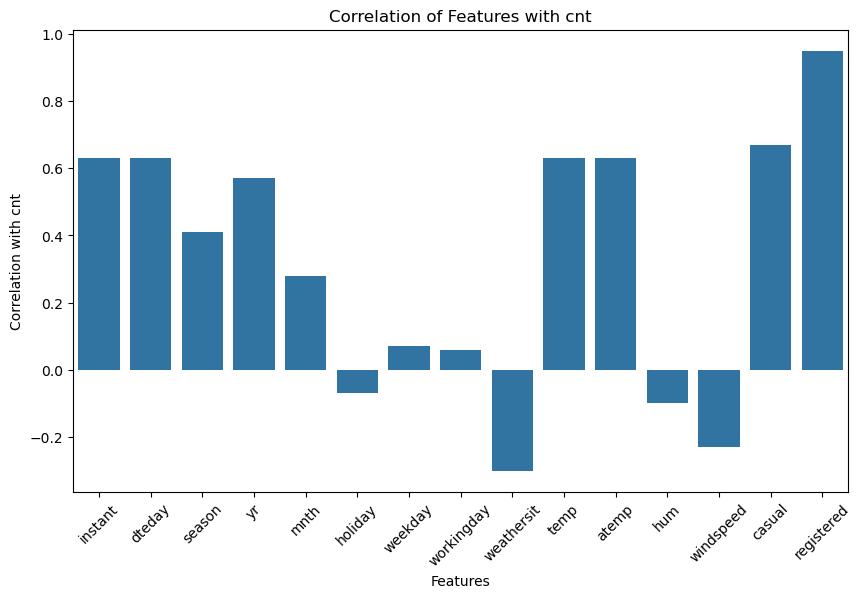

In [23]:
# Calculate the correlation matrix
corr_matrix = df.drop(columns=['year_month', 'temp_actual']).corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Features')

# Show the plot
plt.show()

# Extract the correlation values for 'cnt'
cnt_corr = corr_matrix['cnt'].drop('cnt').round(2)

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sb.barplot(x=cnt_corr.index, y=cnt_corr.values)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Correlation with cnt')
plt.title('Correlation of Features with cnt')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Kesimpulan**: 
Dari dua grafik di atas, terlihat bahwa jumlah order sangat dipengaruhi oleh jumlah user yang teregistrasi. Namun temperatur juga cukup mempengaruhi jumlah order.

**Insight:**
- Tidak ada data yang hilang
- Data penjualan yang tersedia berkisar antara tahun 2011-2012
- Data temperatur berkisar antara temperatur -5 sampai 32 derajat celcius. Tidak ada outlier.
- Jumlah order sangat dipengaruhi oleh jumlah user yang teregistrasi. Namun temperatur juga cukup mempengaruhi jumlah order.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
# Group by year and month
grouped = df.groupby('year_month')['cnt'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(grouped['year_month'].astype(str), grouped['cnt'])

# Add labels and title
plt.xlabel('Year-Month')
plt.ylabel('Count of Total Rental Bikes')
plt.title('Count of Total Rental Bikes by Month and Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

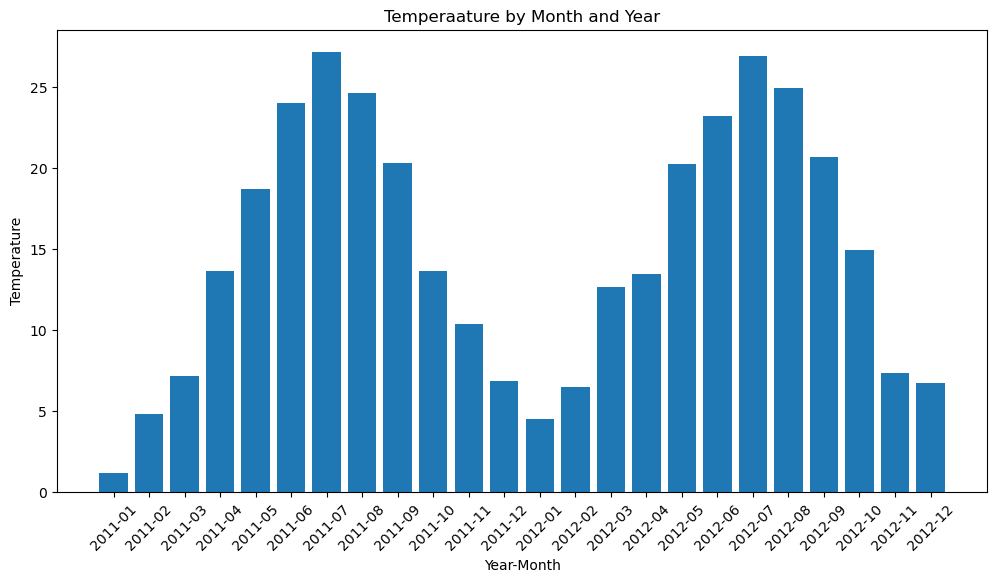

In [ ]:
# Group by year and month
grouped = df.groupby('year_month')['temp_actual'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(grouped['year_month'].astype(str), grouped['temp_actual'])

# Add labels and title
plt.xlabel('Year-Month')
plt.ylabel('Temperature')
plt.title('Temperaature by Month and Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Pertanyaan 2:

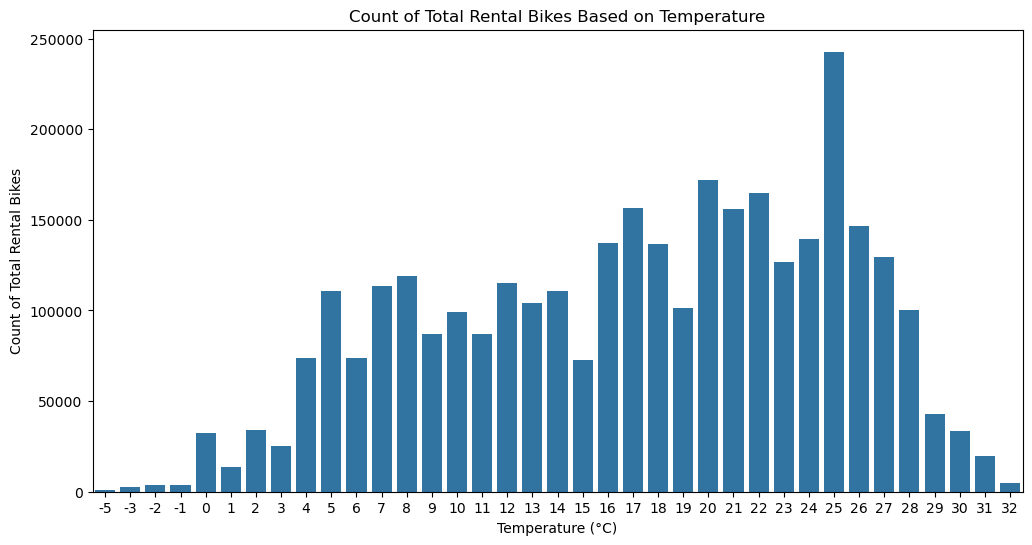

In [ ]:
# Group temperature values
temp_df = df.groupby(by="temp_actual",).agg({
  "cnt" : "sum"
})

# Create the bar plot
plt.figure(figsize=(12, 6))
sb.barplot(x='temp_actual', y='cnt', data=temp_df)

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Count of Total Rental Bikes')
plt.title('Count of Total Rental Bikes Based on Temperature')

# # Show the plot
plt.show()

**Insight:**
- Temperatur pada data bernilai 0 dan 1, jadi harus dikonversi ke rentang -8 ke 39 (sesuai deskripsi data set)

## Conclusion

### Pertanyaan 1
- Penjualan bulan ke bulan di H1 2011 terus meningkat, lalu menunjukkan penurunan di H2 2011. Kemudian, penjualan meningkat lagi di tahun 2012.
- Mayoritas user yang menggunakan jasa bike sharing adalah user yang telah registrasi. Sehingga, sangat perlu bagi perusahaan untuk terus meningkatkan jumlah user yang tergeistrasi untuk meningkatkan jumlah order.

### Pertanyaan 2
- Suhu udara 25 derajat Celcius memiliki penjualan paling banyak, disusul suhu 20 dan 22 derajat Celcius. Angka penjualan tertinggi terdapat pada suhu antara 16-27 derajat celcius. 
- Terlihat juga bahwa jumlah order meningkat sekitar kuartal dua dan tiga setiap tahunnya karena suhu udara berada di atas 20 derajat Celcius yang merupakan suhu udara yang nyaman untuk beraktivitas di uar ruangan.
- Sehingga, perusahaan perlu memanfaatkan waktu antara kuartal dua dan tiga setiap tahunnya untuk meningkatkan jumlah order.